# French Single Home Power Consumption YOUTUBE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Formatting Data

**Reason** Data has about 2 million rows so we need to cut down

In [3]:
# First read without date parsing
house_df = pd.read_csv('../data/household_power_consumption.csv')

# Then combine and convert date and time columns
house_df['datetime'] = pd.to_datetime(house_df['Date'] + ' ' + house_df['Time'], dayfirst=True)
house_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0,2006-12-16 17:28:00


In [140]:
# checking datatypes
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1048575 non-null  object        
 1   Time                   1048575 non-null  object        
 2   Global_active_power    1048575 non-null  object        
 3   Global_reactive_power  1048575 non-null  object        
 4   Voltage                1048575 non-null  object        
 5   Global_intensity       1048575 non-null  object        
 6   Sub_metering_1         1048575 non-null  object        
 7   Sub_metering_2         1048575 non-null  object        
 8   Sub_metering_3         1044506 non-null  float64       
 9   datetime               1048575 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 80.0+ MB


In [141]:
# modifying the dataset so i convert the objects to numerical values
numeric_comlumns = house_df.columns[2:-1]

for cols in numeric_comlumns:
  house_df[cols] = pd.to_numeric(house_df[cols], errors='coerce')

house_df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
datetime                 datetime64[ns]
dtype: object

In [142]:
# data summaries
house_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
count,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1048575
mean,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00,2007-12-15 19:31:00.000001792
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,2.880000e-01,0.000000e+00,2.379700e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-06-16 18:27:30
50%,5.500000e-01,9.800000e-02,2.402100e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-15 19:31:00
75%,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2008-06-14 20:34:30
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01,2008-12-13 21:38:00
std,1.129546e+00,1.095062e-01,3.284504e+00,4.763588e+00,6.321183e+00,6.352703e+00,8.210398e+00,NaN


In [143]:
# checking for missing values
house_df.isnull().sum()

Date                        0
Time                        0
Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3           4069
datetime                    0
dtype: int64

In [144]:
# Then drop the missing values
house_df.dropna(inplace=True)

In [145]:
house_df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
datetime                 0
dtype: int64

In [146]:
house_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0.0,0.0,0.0,2008-12-13 21:34:00
1048571,13/12/2008,21:35:00,0.424,0.076,242.10,1.8,0.0,0.0,0.0,2008-12-13 21:35:00
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0.0,0.0,0.0,2008-12-13 21:36:00
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0.0,0.0,0.0,2008-12-13 21:37:00


In [147]:
# with updated values I now check the statistics of the dataframe
house_df.describe(), house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044506 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1044506 non-null  object        
 1   Time                   1044506 non-null  object        
 2   Global_active_power    1044506 non-null  float64       
 3   Global_reactive_power  1044506 non-null  float64       
 4   Voltage                1044506 non-null  float64       
 5   Global_intensity       1044506 non-null  float64       
 6   Sub_metering_1         1044506 non-null  float64       
 7   Sub_metering_2         1044506 non-null  float64       
 8   Sub_metering_3         1044506 non-null  float64       
 9   datetime               1044506 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 87.7+ MB


(       Global_active_power  Global_reactive_power       Voltage  \
 count         1.044506e+06           1.044506e+06  1.044506e+06   
 mean          1.108202e+00           1.182732e-01  2.399598e+02   
 min           7.600000e-02           0.000000e+00  2.234900e+02   
 25%           2.880000e-01           0.000000e+00  2.379700e+02   
 50%           5.500000e-01           9.800000e-02  2.402100e+02   
 75%           1.544000e+00           1.860000e-01  2.421400e+02   
 max           1.067000e+01           1.390000e+00  2.521400e+02   
 std           1.129546e+00           1.095062e-01  3.284504e+00   
 
        Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
 count      1.044506e+06    1.044506e+06    1.044506e+06    1.044506e+06   
 mean       4.718123e+00    1.177451e+00    1.475177e+00    5.933837e+00   
 min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
 25%        1.200000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
 50%  

In [148]:
# splitting datetime column into M-D-YY
house_df['year'] = house_df['datetime'].dt.year
house_df['month'] = house_df['datetime'].dt.month
house_df['day'] = house_df['datetime'].dt.day
house_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,year,month,day
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0.0,0.0,0.0,2008-12-13 21:34:00,2008,12,13
1048571,13/12/2008,21:35:00,0.424,0.076,242.10,1.8,0.0,0.0,0.0,2008-12-13 21:35:00,2008,12,13
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0.0,0.0,0.0,2008-12-13 21:36:00,2008,12,13
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0.0,0.0,0.0,2008-12-13 21:37:00,2008,12,13


In [149]:
# since were splitting up the data into year, month, and day it is essentially to let pandas know what values in the dataframe are time based
house_df['datetime'] = pd.to_datetime({
 'year': house_df['year'],
 'month': house_df['month'],
 'day': house_df['day']   
})

In [150]:
# Group by month and calculate average daily consumption
# First group by year, month, and day to get daily sums
daily_sums = house_df.groupby(['year', 'month', 'day']).agg({
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum'
})

# Then group by month to get monthly averages of daily sums
monthly_avg = daily_sums.groupby('month').mean()

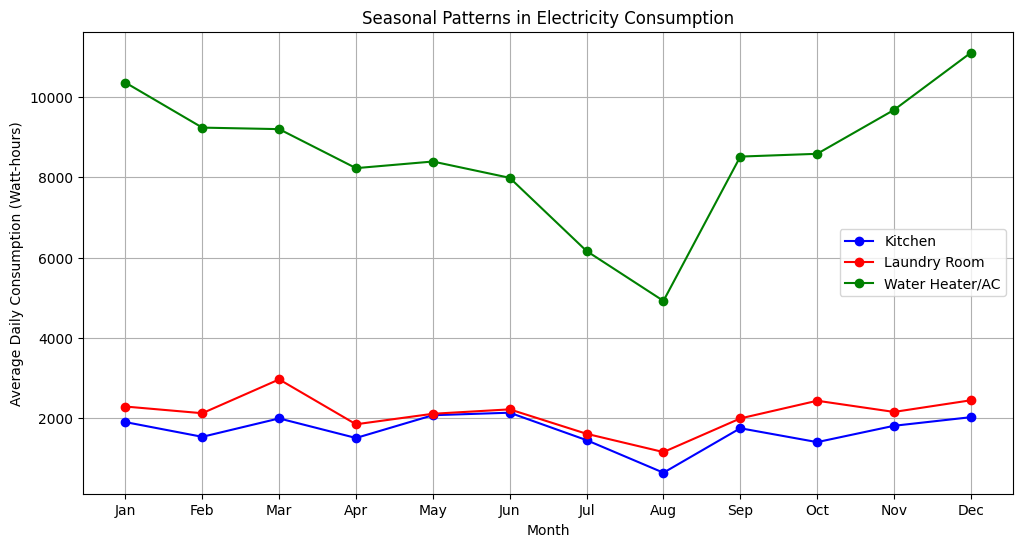

In [151]:

# Plot the monthly averages for each sub-metering
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Sub_metering_1'], 'b-o', label='Kitchen')
plt.plot(monthly_avg.index, monthly_avg['Sub_metering_2'], 'r-o', label='Laundry Room')
plt.plot(monthly_avg.index, monthly_avg['Sub_metering_3'], 'g-o', label='Water Heater/AC')
plt.xlabel('Month')
plt.ylabel('Average Daily Consumption (Watt-hours)')
plt.title('Seasonal Patterns in Electricity Consumption')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

In [152]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add season to your original dataframe
house_df['season'] = house_df['month'].apply(get_season)

# Create dummy variables for seasons (one-hot encoding)
season_dummies = pd.get_dummies(house_df['season'], prefix='season')
house_df = pd.concat([house_df, season_dummies], axis=1)
house_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,year,month,day,season,season_Fall,season_Spring,season_Summer,season_Winter
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16,2006,12,16,Winter,False,False,False,True
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16,2006,12,16,Winter,False,False,False,True
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16,2006,12,16,Winter,False,False,False,True
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16,2006,12,16,Winter,False,False,False,True
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16,2006,12,16,Winter,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0.0,0.0,0.0,2008-12-13,2008,12,13,Winter,False,False,False,True
1048571,13/12/2008,21:35:00,0.424,0.076,242.10,1.8,0.0,0.0,0.0,2008-12-13,2008,12,13,Winter,False,False,False,True
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0.0,0.0,0.0,2008-12-13,2008,12,13,Winter,False,False,False,True
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0.0,0.0,0.0,2008-12-13,2008,12,13,Winter,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features to use for prediction
features = ['month', 'season_Spring', 'season_Summer', 'season_Fall']

# Dictionary to store results
model_results = {}

# For each sub-metering, create a model
for sub_meter in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    # Prepare X and y
    X = house_df[features]
    y = house_df[sub_meter]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    model_results[sub_meter] = {
        'model': model,
        'rmse': rmse,
        'r2': r2,
        'coefficients': dict(zip(features, model.coef_)),
        'intercept': model.intercept_
    }
    
    # Print results
    print(f"\nModel for {sub_meter}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("Coefficients:")
    for feature, coef in zip(features, model.coef_):
        print(f"{feature}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")


Model for Sub_metering_1:
RMSE: 6.30
R2 Score: 0.00
Coefficients:
month: 0.0056
season_Spring: 0.0375
season_Summer: -0.3120
season_Fall: -0.1565
Intercept: 1.2515

Model for Sub_metering_2:
RMSE: 6.35
R2 Score: 0.00
Coefficients:
month: -0.0008
season_Spring: 0.0260
season_Summer: -0.4439
season_Fall: -0.0493
Intercept: 1.6001

Model for Sub_metering_3:
RMSE: 8.15
R2 Score: 0.01
Coefficients:
month: 0.0574
season_Spring: -1.0569
season_Summer: -2.8600
season_Fall: -1.2231
Intercept: 6.8557


<Figure size 1200x800 with 0 Axes>

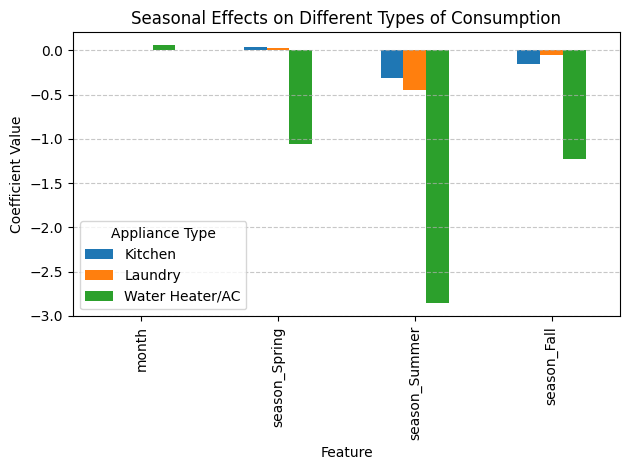

In [154]:
# Prepare data for coefficient comparison
coef_comparison = pd.DataFrame({
    'Kitchen': [model_results['Sub_metering_1']['coefficients'][f] for f in features],
    'Laundry': [model_results['Sub_metering_2']['coefficients'][f] for f in features],
    'Water Heater/AC': [model_results['Sub_metering_3']['coefficients'][f] for f in features]
}, index=features)

# Plot coefficient comparison
plt.figure(figsize=(12, 8))
coef_comparison.plot(kind='bar')
plt.title('Seasonal Effects on Different Types of Consumption')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Appliance Type')
plt.tight_layout()
plt.show()

Looking at the coefficients will reveal which appliances are most affected by seasonal changes. For example, you'll likely see that Sub_metering_3 (Water Heater/AC) has much larger coefficients for seasons than the kitchen appliances.

1. **Model objective**: Analyzing how seasonal factors affect different types of household energy consumption

2. **What I did**
   - Converting dates to proper datetime format
   - Handling missing values
   - Creating relevant features (year, month, day)
   - Creating time-based features
   - Aggregating data appropriately (daily/monthly)

4. **Modeling approach**:
   - Using linear regression to quantify relationships
   - Creating separate models for different sub-metering types
   - Including seasonal indicators as features

5. **Visualization plan**:
   - Showing monthly patterns
   - Comparing consumption across different appliance types
   - Illustrating seasonal effects